In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
import os
import pandas as pd
from math import floor
import scipy.stats as stats

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

round_error = lambda value,rounder : np.round(value,dcmls(rounder))

def chi2(y,y_err,x,func,popt):
    y_ajuste = func(x,*popt)
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    return chi_cuadrado

def chi2_red(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def pvalue(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    pvalor = stats.chi2.sf(chi_cuadrado,grados_lib)
    return pvalor

In [4]:
from PIL import Image
import imageio.v3 as imageio

In [68]:
#todas sin recortar en vertical
#apagada 520 a 875, -2.5
#prendida 1 400 a 600 -1.5
#prendida 2 750 a 1080 -2.5

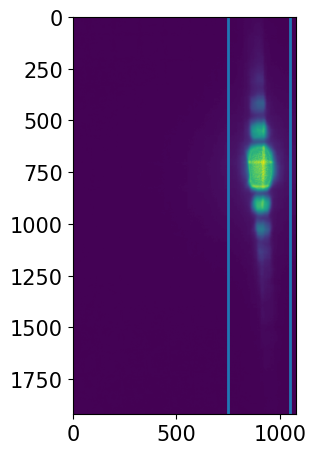

In [65]:
im0 = imageio.imread('images/luz prendida 2/0/IMG_4414.png')
plt.imshow(im0)
im0.shape
plt.axvline(750)
plt.axvline(1050)

In [66]:
im1 = Image.open('images/luz prendida 2/0/IMG_4414.png')

im1 = im1.crop((750,0,1080,1920))
im1 = im1.rotate(-2.5)
im1.show()
#im1.save('prueba.png')
im1.close()

In [67]:
files = os.listdir('images/luz prendida 2/0')
for file in files:
    im1 = Image.open(f'images/luz prendida 2/0/{file}')
    im1 = im1.crop((750,0,1080,1920))
    im1 = im1.rotate(-2.5)
#    im1.show()
    im1.save(f'images/luz prendida 2/cropped/{file}')
    im1.close()

In [9]:
pesas = {'cable':0.7749,'gancho':1.6949,'soporte':13.9885,1:20.0513,2:9.9358,3:5.1120,4:10.0746,5:10.1283,6:7.7091,7:6.4326,8:4.7368,'F':16.0065} # gramos
err_pesas = 0.0001

pesos_1 = [0,pesas['cable'],pesas['cable']+pesas[8],pesas['cable']+pesas[8]+pesas[3],pesas['cable']+pesas[8]+pesas[3]+pesas[2],pesas['cable']+pesas[8]+pesas[3]+pesas[2]+pesas[7],
          pesas['cable']+pesas[7]+pesas[8],pesas['cable']+pesas[4]+pesas[6],pesas['cable']+pesas[3]+pesas[5],pesas['cable']+pesas[7],pesas['cable']+pesas[2]]
pesos_off = [0,pesas['gancho'],pesas['gancho']+pesas[2],pesas['gancho']+pesas[2]+pesas[3],pesas['gancho']+pesas[2]+pesas[3]+pesas[4],pesas['gancho']+pesas[2]+pesas[6],
             pesas['gancho']+pesas[7]+pesas[8],pesas['gancho']+pesas[6]+pesas[4],pesas['gancho']+pesas[5]+pesas[3],pesas['gancho']+pesas[5],
             pesas['gancho']+pesas[2]+pesas[8]+pesas[5],pesas['gancho']+pesas[3]+pesas[4],pesas['gancho']+pesas[3]+pesas[8]]
pesos_2 = [pesas['gancho'],pesas['gancho']+pesas[2],pesas['gancho']+pesas[3],pesas['gancho']+pesas[4],pesas['gancho']+pesas[6],pesas['gancho']+pesas[2]+pesas[3],
           pesas['gancho']+pesas[3]+pesas[4],pesas['gancho']+pesas[4]+pesas[5],pesas['gancho']+pesas[6]+pesas[8],pesas['gancho']+pesas[7]+pesas[6],
           pesas['gancho']+pesas[2]+pesas[3]+pesas[4]]
len(pesos_off)

13

In [88]:
imagen = imageio.imread('images/luz prendida 2/cropped/IMG_4414.png').transpose()

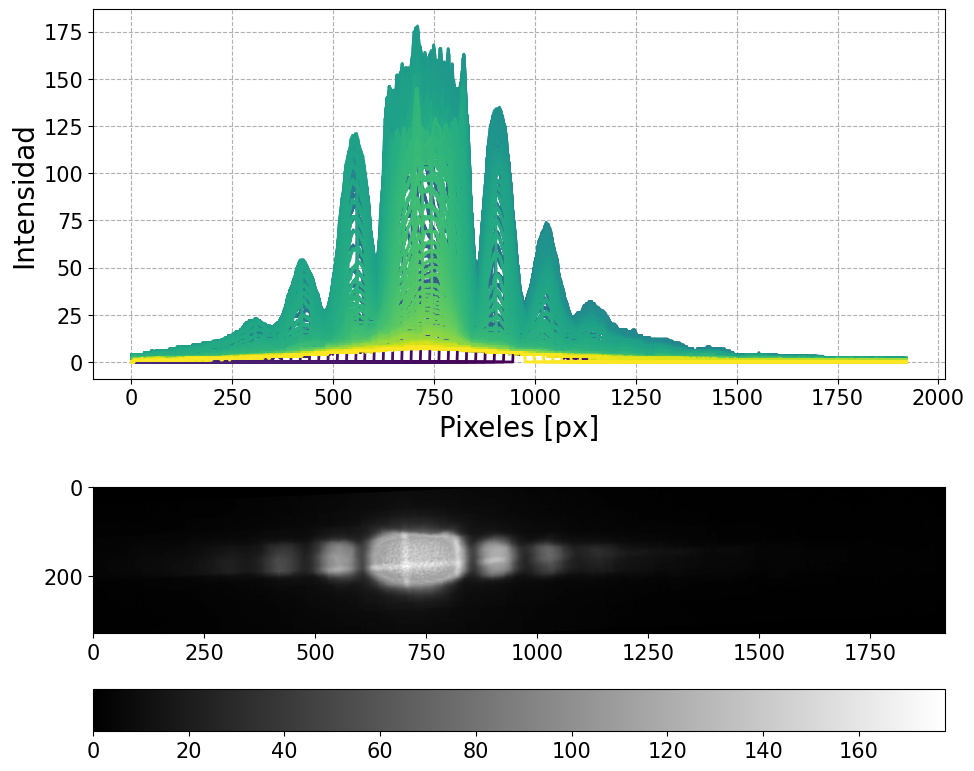

In [93]:
dom = np.array(range(1, 1921)) 
# mappable = plt.imshow([imagen[0]], cmap='viridis')
plt.figure(figsize=[10,8])
plt.subplot(2, 1, 1)  # Dos filas, una columna, primer gráfico
a = 1
for i in range(len(imagen)):
    plt.plot(dom, imagen[i, :], c=plt.cm.viridis(i / len(imagen)), label=f'Fila {i}', alpha=a)
#    a = a - 0.005
# Añadir una barra de colores para mostrar la correspondencia entre valores y colores
plt.xlabel('Pixeles [px]', fontsize='20')
plt.ylabel('Intensidad', fontsize='20')
plt.grid(linestyle='--')

# Segundo gráfico
plt.subplot(2, 1, 2)  # Dos filas, una columna, segundo gráfico
plt.imshow(imagen, cmap='gray')
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.invert_yaxis()

plt.tight_layout()  # Ajusta automáticamente el espaciado entre los gráficos para evitar solapamientos
plt.show()